In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018/2018-03-btc-krw.csv")

In [3]:
df.dtypes # identifying column type

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [5]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [6]:
## creating 'hour - amount' connection
group_hour_amount = df['amount'].groupby(df['timestamp_hour'])

In [7]:
## 시간별 transaction 수
group_hour_amount.size()

timestamp_hour
0     1431
1     1435
2     1362
3     1007
4      909
5      998
6     1181
7     1395
8     1492
9     1655
10    1558
11    1657
12    1358
13    1386
14    1365
15    1414
16    1396
17    1421
18    1447
19    1404
20    1433
21    1440
22    1575
23    1430
Name: amount, dtype: int64

In [8]:
## 시간별 총 sell - buy
group_hour_amount.sum()

timestamp_hour
0     -70575901
1     -26638081
2      29648069
3     -38468287
4     -88938305
5      96938743
6      42476509
7     -17207259
8      -2657156
9     -58073586
10      2471990
11    128216711
12    -43115712
13     78110294
14   -103705102
15    -19624119
16     40651264
17    -13008849
18     10949286
19     57796174
20    -13390304
21    -41617311
22     79154157
23    -17256723
Name: amount, dtype: int64

In [9]:
## creating 'hourly - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_hour_amount_positive = df2['amount'].groupby(df2['timestamp_hour'])

In [10]:
# 시간별 sell transaction 수 (positive)
group_hour_amount_positive.size()

timestamp_hour
0      893
1      857
2      810
3      597
4      591
5      662
6      740
7      851
8      935
9      982
10    1008
11    1086
12     815
13     869
14     832
15     882
16     867
17     860
18     885
19     833
20     917
21     873
22     944
23     864
Name: amount, dtype: int64

In [11]:
# 시간별 sell 총합
group_hour_amount_positive.sum()

timestamp_hour
0     2654669224
1     2679368489
2     2314496530
3     1533485342
4     1656985150
5     1738766944
6     1911620533
7     2525272340
8     2661451298
9     3223896983
10    3000501137
11    3033178349
12    2714442429
13    2784250354
14    2573148668
15    2583444000
16    2523010687
17    2504644337
18    2799077517
19    2535030252
20    2713066233
21    2616110809
22    2802532780
23    2587265214
Name: amount, dtype: int64

In [12]:
## creating 'hour - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_hour_amount_negative = df3['amount'].groupby(df3['timestamp_hour'])

In [13]:
# 시간별 buy transaction 수
group_hour_amount_negative.size()

timestamp_hour
0     538
1     578
2     552
3     410
4     318
5     336
6     441
7     544
8     557
9     673
10    550
11    571
12    543
13    517
14    533
15    532
16    529
17    561
18    562
19    571
20    516
21    567
22    631
23    566
Name: amount, dtype: int64

In [14]:
# 시간별 buy 총합
group_hour_amount_negative.sum()

timestamp_hour
0    -2725245125
1    -2706006570
2    -2284848461
3    -1571953629
4    -1745923455
5    -1641828201
6    -1869144024
7    -2542479599
8    -2664108454
9    -3281970569
10   -2998029147
11   -2904961638
12   -2757558141
13   -2706140060
14   -2676853770
15   -2603068119
16   -2482359423
17   -2517653186
18   -2788128231
19   -2477234078
20   -2726456537
21   -2657728120
22   -2723378623
23   -2604521937
Name: amount, dtype: int64

In [15]:
# 시간별 절대값 총합
# negative는 buy
absolute_negative_sum = group_hour_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
# total 은 sell - buy
absolute_total_amount = absolute_negative_sum+group_hour_amount_positive.sum()
absolute_total_amount

timestamp_hour
0     5379914349
1     5385375059
2     4599344991
3     3105438971
4     3402908605
5     3380595145
6     3780764557
7     5067751939
8     5325559752
9     6505867552
10    5998530284
11    5938139987
12    5472000570
13    5490390414
14    5250002438
15    5186512119
16    5005370110
17    5022297523
18    5587205748
19    5012264330
20    5439522770
21    5273838929
22    5525911403
23    5191787151
Name: amount, dtype: int64

In [16]:
## 시간별 계산 table 생성
dfs = [group_hour_amount.size(), group_hour_amount.sum(), group_hour_amount_positive.size(), group_hour_amount_positive.sum(), group_hour_amount_negative.size(), group_hour_amount_negative.sum(), absolute_total_amount, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_hour'), dfs)
day_df_final.columns = [ "Hourly transaction", "Hourly sell-buy", "Hourly sell transaction", "Hourly sell", "Hourly buy transaction", "Hourly buy", "Hourly total sell", "Hourly absolute total buy"]
day_df_final

,Hourly transaction,Hourly sell-buy,Hourly sell transaction,Hourly sell,Hourly buy transaction,Hourly buy,Hourly total sell,Hourly absolute total buy
timestamp_hour,,,,,,,,
0,1431,-70575901,893,2654669224,538,-2725245125,5379914349,2725245125
1,1435,-26638081,857,2679368489,578,-2706006570,5385375059,2706006570
2,1362,29648069,810,2314496530,552,-2284848461,4599344991,2284848461
3,1007,-38468287,597,1533485342,410,-1571953629,3105438971,1571953629
4,909,-88938305,591,1656985150,318,-1745923455,3402908605,1745923455
5,998,96938743,662,1738766944,336,-1641828201,3380595145,1641828201
6,1181,42476509,740,1911620533,441,-1869144024,3780764557,1869144024
7,1395,-17207259,851,2525272340,544,-2542479599,5067751939,2542479599
8,1492,-2657156,935,2661451298,557,-2664108454,5325559752,2664108454


In [17]:
day_df_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/hour_result_table_2018_03.csv", header=True, index=True, encoding = 'utf-8')

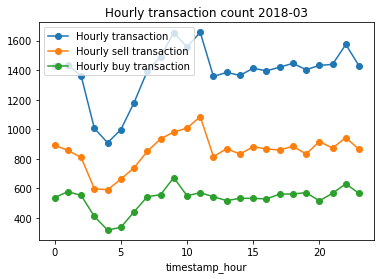

In [18]:
day_df_final[['Hourly transaction', 'Hourly sell transaction', 'Hourly buy transaction']].plot(title='Hourly transaction count 2018-03', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count_2018_03.png', dpi=300)

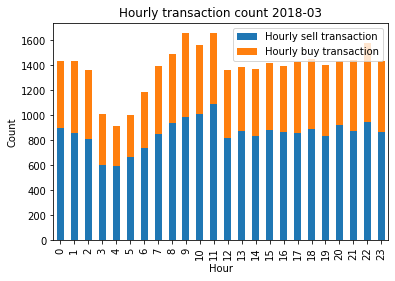

In [19]:
hourTransGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count 2018-03', stacked=True)
hourTransGraph.set_xlabel('Hour')
hourTransGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Stacked)_2018_03.png', dpi=300)

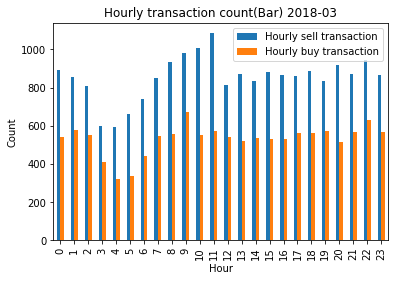

In [20]:
hourTransBarGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count(Bar) 2018-03')
hourTransBarGraph.set_xlabel('Hour')
hourTransBarGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Bar)_2018_03.png', dpi=300)

In [21]:
# Minute
## creating 'minute - amount' connection
group_minute_amount = df['amount'].groupby(df['timestamp_minute'])

In [22]:
# Date
# Creating 'date - amount' connection
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [23]:
# 분 당 transaction 수
group_minute_amount.size()

timestamp_minute
0     701
1     634
2     609
3     509
4     593
5     625
6     523
7     579
8     602
9     582
10    523
11    543
12    571
13    615
14    562
15    543
16    492
17    516
18    549
19    496
20    477
21    576
22    575
23    573
24    522
25    501
26    549
27    582
28    540
29    588
30    545
31    590
32    565
33    594
34    560
35    529
36    533
37    522
38    555
39    573
40    560
41    509
42    549
43    464
44    579
45    549
46    583
47    544
48    555
49    489
50    530
51    523
52    519
53    517
54    518
55    554
56    519
57    579
58    560
59    533
Name: amount, dtype: int64

In [24]:
# date 당 transaction 수
group_date_amount.size()

timestamp_day
1     1042
2     1224
3     1406
4     1278
5      613
8     1049
9     1028
10    1119
11     928
12    1144
13    1216
14     731
15    1081
16     772
17     666
18    1046
19    1346
20    1744
21    1706
22    1782
23    1178
24    1389
25    1176
26    1149
27    1341
28    1240
29     765
30    1027
31     963
Name: amount, dtype: int64

In [25]:
# minute 별 sell - buy 금액
group_minute_amount.sum()

timestamp_minute
0    -145358501
1    -126141831
2     219261161
3     -13138529
4     267162353
5     126947471
6     125034683
7    -406162843
8     129852192
9     110642812
10    -90533174
11   -271201971
12    -48819556
13    360491784
14    120352166
15   -254376117
16     47405667
17     57007936
18    -60865377
19   -125502763
20     59162934
21    352672264
22   -263072420
23     53972304
24   -177420432
25    -10427310
26    -79053794
27    -62074760
28   -163947346
29    -99813789
30   -404781339
31    120088891
32     68767689
33   -247119650
34    225503381
35     24424211
36    -43132197
37     90467576
38    -66827810
39    106884738
40    -13992340
41     24801289
42    186050671
43   -138122542
44   -132386124
45    219130368
46     45545128
47     91038113
48   -166712777
49    -19954376
50   -105101726
51   -102218805
52    237088321
53   -247594416
54    -42443184
55    194636889
56    200050758
57    143753868
58    105505261
59     26731422
Name: amount, dtype: in

In [26]:
# date 별 sell - buy 금액
group_hour_amount.sum()

timestamp_hour
0     -70575901
1     -26638081
2      29648069
3     -38468287
4     -88938305
5      96938743
6      42476509
7     -17207259
8      -2657156
9     -58073586
10      2471990
11    128216711
12    -43115712
13     78110294
14   -103705102
15    -19624119
16     40651264
17    -13008849
18     10949286
19     57796174
20    -13390304
21    -41617311
22     79154157
23    -17256723
Name: amount, dtype: int64

In [27]:
# creating 'minute' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_minute_amount_positive = df2['amount'].groupby(df2['timestamp_minute'])

In [28]:
# creating 'date' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [29]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     417
1     358
2     395
3     319
4     409
5     391
6     352
7     348
8     390
9     371
10    316
11    319
12    355
13    415
14    350
15    316
16    313
17    320
18    334
19    292
20    295
21    383
22    320
23    347
24    300
25    281
26    368
27    366
28    316
29    377
30    299
31    391
32    348
33    351
34    376
35    315
36    329
37    334
38    312
39    354
40    347
41    324
42    356
43    261
44    353
45    341
46    351
47    327
48    346
49    290
50    310
51    331
52    334
53    300
54    302
55    357
56    341
57    377
58    350
59    313
Name: amount, dtype: int64

In [30]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1      629
2      706
3      797
4      708
5      350
8      597
9      630
10     670
11     566
12     666
13     791
14     449
15     655
16     511
17     422
18     661
19     769
20    1122
21    1070
22    1179
23     774
24     851
25     689
26     760
27     834
28     837
29     512
30     645
31     603
Name: amount, dtype: int64

In [31]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     417
1     358
2     395
3     319
4     409
5     391
6     352
7     348
8     390
9     371
10    316
11    319
12    355
13    415
14    350
15    316
16    313
17    320
18    334
19    292
20    295
21    383
22    320
23    347
24    300
25    281
26    368
27    366
28    316
29    377
30    299
31    391
32    348
33    351
34    376
35    315
36    329
37    334
38    312
39    354
40    347
41    324
42    356
43    261
44    353
45    341
46    351
47    327
48    346
49    290
50    310
51    331
52    334
53    300
54    302
55    357
56    341
57    377
58    350
59    313
Name: amount, dtype: int64

In [32]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1      629
2      706
3      797
4      708
5      350
8      597
9      630
10     670
11     566
12     666
13     791
14     449
15     655
16     511
17     422
18     661
19     769
20    1122
21    1070
22    1179
23     774
24     851
25     689
26     760
27     834
28     837
29     512
30     645
31     603
Name: amount, dtype: int64

In [33]:
# creating 'minute - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_minute_amount_negative = df3['amount'].groupby(df3['timestamp_minute'])

In [34]:
## creating 'date - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [35]:
# minute 별 buy transaction 수
group_minute_amount_negative.size()

timestamp_minute
0     284
1     276
2     214
3     190
4     184
5     234
6     171
7     231
8     212
9     211
10    207
11    224
12    216
13    200
14    212
15    227
16    179
17    196
18    215
19    204
20    182
21    193
22    255
23    226
24    222
25    220
26    181
27    216
28    224
29    211
30    246
31    199
32    217
33    243
34    184
35    214
36    204
37    188
38    243
39    219
40    213
41    185
42    193
43    203
44    226
45    208
46    232
47    217
48    209
49    199
50    220
51    192
52    185
53    217
54    216
55    197
56    178
57    202
58    210
59    220
Name: amount, dtype: int64

In [36]:
# date 별 buy transaction 수
group_date_amount_negative.size()

timestamp_day
1     413
2     518
3     609
4     570
5     263
8     452
9     398
10    449
11    362
12    478
13    425
14    282
15    426
16    261
17    244
18    385
19    577
20    622
21    636
22    603
23    404
24    538
25    487
26    389
27    507
28    403
29    253
30    382
31    360
Name: amount, dtype: int64

In [37]:
# minute 별 buy 총합
group_minute_amount_negative.sum()

timestamp_minute
0    -1402495394
1    -1230425824
2    -1149025339
3     -897491672
4     -859240950
5     -948540502
6     -872925981
7    -1375645144
8     -989327816
9     -939622088
10    -929254862
11   -1123167621
12   -1132248659
13    -837509866
14    -988578707
15   -1150737580
16    -893458558
17    -941668885
18   -1030021102
19    -983375163
20    -862611472
21    -851952615
22   -1103551141
23   -1016343910
24    -982648467
25    -942679042
26   -1065335764
27   -1021543704
28   -1113671964
29   -1145288225
30   -1267679814
31   -1028946039
32   -1026661765
33   -1240975453
34    -901055247
35   -1067588165
36   -1036017669
37    -945711852
38   -1080659056
39    -943392153
40    -941236358
41    -900278033
42    -893632229
43    -897242616
44   -1111230040
45    -924952309
46    -983435651
47   -1018768505
48   -1245280330
49   -1009413548
50    -943310090
51   -1003288942
52    -902356631
53   -1100984894
54    -920031846
55    -883466833
56    -916339523
57    -9992863

In [38]:
# daye 별 buy 총합
group_date_amount_negative.sum()

timestamp_day
1    -1728236426
2    -2577649963
3    -2831183161
4    -2652813352
5    -1154027901
8    -2069084881
9    -2015514628
10   -2091511978
11   -1645986343
12   -2171547902
13   -2633549092
14   -1487101110
15   -2170578160
16   -1208736720
17   -1161285171
18   -1635347586
19   -2641899565
20   -3269680226
21   -3680123721
22   -3538345068
23   -2090415588
24   -2471194783
25   -2047024952
26   -1681231797
27   -2014412482
28   -1987098965
29    -978908781
30   -1684259020
31   -1338829775
Name: amount, dtype: int64

In [39]:
# minute 별 절대값 총합
# negative는 buy
absolute_minute_negative_sum = group_minute_amount_negative.sum()
absolute_minute_negative_sum = absolute_minute_negative_sum * (-1)
# total 은 sell - buy
absolute_minute_total_amount = absolute_minute_negative_sum+group_minute_amount_positive.sum()
absolute_minute_total_amount

timestamp_minute
0     2659632287
1     2334709817
2     2517311839
3     1781844815
4     1985644253
5     2024028475
6     1870886645
7     2345127445
8     2108507824
9     1989886988
10    1767976550
11    1975133271
12    2215677762
13    2035511516
14    2097509580
15    2047099043
16    1834322783
17    1940345706
18    1999176827
19    1841247563
20    1784385878
21    2056577494
22    1944029862
23    2086660124
24    1787876502
25    1874930774
26    2051617734
27    1981012648
28    2063396582
29    2190762661
30    2130578289
31    2177980969
32    2122091219
33    2234831256
34    2027613875
35    2159600541
36    2028903141
37    1981891280
38    2094490302
39    1993669044
40    1868480376
41    1825357355
42    1973315129
43    1656362690
44    2090073956
45    2069034986
46    2012416430
47    2128575123
48    2323847883
49    1998872720
50    1781518454
51    1904359079
52    2041801583
53    1954375372
54    1797620508
55    1961570555
56    2032729804
57    21423266

In [40]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total 은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount

timestamp_day
1     3457315162
2     5145449649
3     5674419144
4     5287939680
5     2305581143
8     4126940733
9     4045142965
10    4184496520
11    3293140751
12    4344435566
13    5267633016
14    2974781490
15    4342824566
16    2416980924
17    2303541787
18    3290579789
19    5291113541
20    6542098235
21    7357500987
22    7081945877
23    4181688861
24    4928844504
25    4109445995
26    3362233197
27    4013175378
28    3991340224
29    1958198700
30    3351835218
31    2696671094
Name: amount, dtype: int64

In [41]:
# minute 별 계산 table 생성
dfs = [group_minute_amount.size(), group_minute_amount.sum(), group_minute_amount_positive.size(), group_minute_amount_positive.sum(), group_minute_amount_negative.size(), group_minute_amount_negative.sum(), absolute_minute_total_amount, absolute_minute_negative_sum]
day_df_minute_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_minute'), dfs)
day_df_minute_final.columns = [ "Minute transaction", "Minute sell-buy", "Minute sell transaction", "Minute sell", "Minute buy transaction", "Minute buy", "Minute total sell", "Minute absolute total buy"]
day_df_minute_final

,Minute transaction,Minute sell-buy,Minute sell transaction,Minute sell,Minute buy transaction,Minute buy,Minute total sell,Minute absolute total buy
timestamp_minute,,,,,,,,
0,701,-145358501,417,1257136893,284,-1402495394,2659632287,1402495394
1,634,-126141831,358,1104283993,276,-1230425824,2334709817,1230425824
2,609,219261161,395,1368286500,214,-1149025339,2517311839,1149025339
3,509,-13138529,319,884353143,190,-897491672,1781844815,897491672
4,593,267162353,409,1126403303,184,-859240950,1985644253,859240950
5,625,126947471,391,1075487973,234,-948540502,2024028475,948540502
6,523,125034683,352,997960664,171,-872925981,1870886645,872925981
7,579,-406162843,348,969482301,231,-1375645144,2345127445,1375645144
8,602,129852192,390,1119180008,212,-989327816,2108507824,989327816


In [42]:
# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_total_amount, absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date total sell", "Date absolute total buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date total sell,Date absolute total buy
timestamp_day,,,,,,,,
1,1042,842310,629,1729078736,413,-1728236426,3457315162,1728236426
2,1224,-9850277,706,2567799686,518,-2577649963,5145449649,2577649963
3,1406,12052822,797,2843235983,609,-2831183161,5674419144,2831183161
4,1278,-17687024,708,2635126328,570,-2652813352,5287939680,2652813352
5,613,-2474659,350,1151553242,263,-1154027901,2305581143,1154027901
8,1049,-11229029,597,2057855852,452,-2069084881,4126940733,2069084881
9,1028,14113709,630,2029628337,398,-2015514628,4045142965,2015514628
10,1119,1472564,670,2092984542,449,-2091511978,4184496520,2091511978
11,928,1168065,566,1647154408,362,-1645986343,3293140751,1645986343


In [43]:
# table 저장하기
day_df_minute_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/minute_result_table_2018_03.csv", header=True, index=True, encoding = 'utf-8')

In [44]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table_2018_03.csv", header=True, index=True, encoding = 'utf-8')

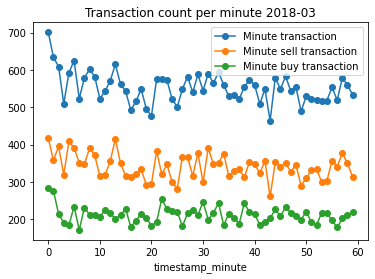

In [45]:
# Minute - transaction 그래프 그리기
day_df_minute_final[['Minute transaction', 'Minute sell transaction', 'Minute buy transaction']].plot(title='Transaction count per minute 2018-03', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute_2018_03.png', dpi=300)

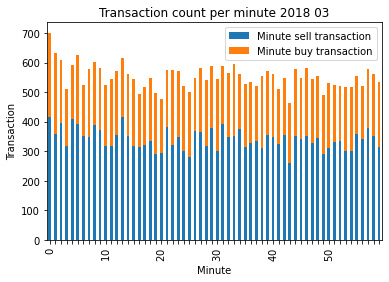

In [46]:
minuteTransGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute 2018 03', stacked=True)
minuteTransGraph.set_xlabel('Minute')
minuteTransGraph.set_ylabel('Transaction')
minuteTransGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Stacked)_2018_03.png', dpi=300)

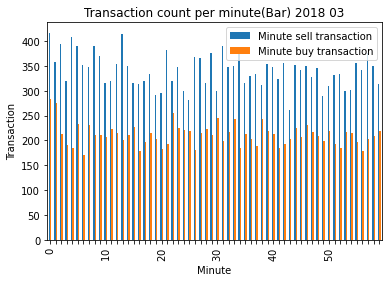

In [47]:
minuteTransBarGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute(Bar) 2018 03')
minuteTransBarGraph.set_xlabel('Minute')
minuteTransBarGraph.set_ylabel('Transaction')
minuteTransBarGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Bar)_2018_03.png', dpi=300)

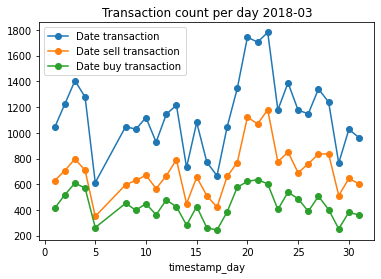

In [48]:
# Date - transaction 그래프 그리기
day_df_date_final[['Date transaction', 'Date sell transaction', 'Date buy transaction']].plot(title='Transaction count per day 2018-03', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day_2018_03.png', dpi=300)

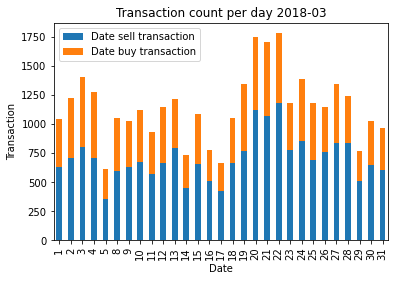

In [49]:
dayTransGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day 2018-03', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Stacked)_2018_03.png', dpi=300)

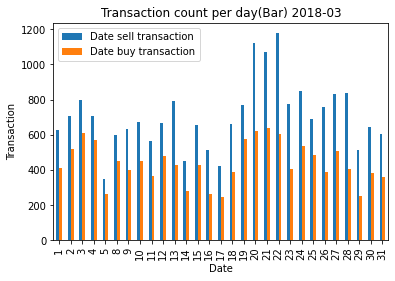

In [50]:
dayTransBarGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day(Bar) 2018-03')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Bar)_2018_03.png', dpi=300)